#**Python Code Implementation of t-SNE on MNIST Dataset**


#Step 1 :
##Importing Necessary Modules.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 2 :
## load the MNIST_test dataset into pandas dataframe

In [86]:
# Reading the data using pandas
df = pd.read_csv('mnist_train.csv')
df = pd.concat([df,pd.read_csv('mnist_test.csv')])
# print first five rows of df
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# Drop the label feature and
# store the pixel data in d.
X = df.drop(columns = 'label')

# Step 3  :
## Standardize the data

In [93]:
# Data-preprocessing: Standardizing the data
X_pro = StandardScaler().fit_transform(X)

# Step 4 :  Reduce the columns data to 2 dimensions




In [96]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
X_pro_1000 = X_pro[0:1000, :]


In [98]:
# Assuming 'label' column exists in the original dataframe 'df'

# Extract labels from the original dataframe
labels = df['label']
labels_1000 = labels[:1000]

# Step 5 :
## define the model

In [101]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000


# Step 6 :
## Fit the model

In [104]:
tsne_fit = tsne.fit_transform(X_pro_1000)
# creating a new data frame which
# help us in plotting the result data




In [105]:
tsne_fit = np.vstack((tsne_fit.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_fit,
     columns =("Dim_1", "Dim_2", "label"))

In [106]:
tsne_df

,Dim_1,Dim_2,label
0,-29.000233,21.218462,5.0
1,1.139315,34.268368,0.0
2,2.239211,-42.846966,4.0
3,-17.537399,-9.061377,1.0
4,-5.312152,-30.649267,9.0
...,...,...,...
995,26.166836,-33.184261,7.0
996,17.887825,17.094908,6.0
997,-5.899723,35.027496,0.0
998,-1.211422,13.348228,3.0


# Step 7 :
##  Plotting the result

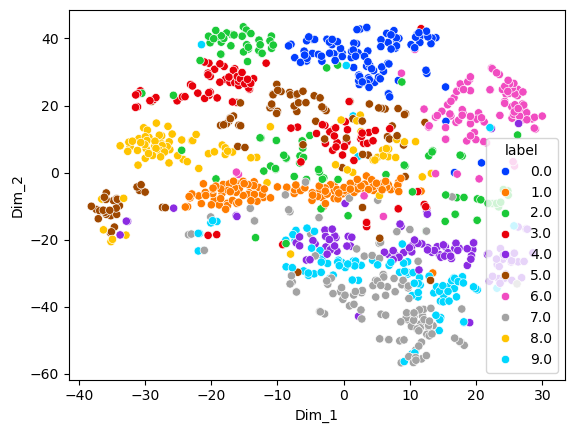

In [113]:
# Plotting the result of tsne
import seaborn as sn
import matplotlib.pyplot as plt
sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright");


#**Well Done**